In [1]:
# colab에서 같은 폴더에 있는 데이터 csv파일 불러오기

import pandas as pd
# from google.colab import files

In [2]:
# uploaded = files.upload()

In [3]:
#filename = list(uploaded.keys())[0]  # 업로드한 첫 번째 파일의 이름을 가져옵니다.
data = pd.read_csv("./dataset/clean_feature/feature.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   54 non-null     object 
 1   basis                  54 non-null     float64
 2   basis_risk             54 non-null     float64
 3   basis_disparate_ratio  54 non-null     float64
 4   cd_p_change(%)         54 non-null     float64
 5   cd_p_range             54 non-null     float64
 6   cny_yesterday_change   54 non-null     float64
 7   cny_night_change       54 non-null     float64
 8   jpy_yesterday_change   54 non-null     float64
 9   jpy_night_change       54 non-null     float64
 10  kospi_p_change(%)      54 non-null     float64
 11  kospi_p_range          54 non-null     float64
 12  ks200_p_change(%)      54 non-null     float64
 13  ks200_p_range          54 non-null     float64
 14  NAS_close_change       54 non-null     float64
 15  NAS_day_

In [4]:
# # 나스닥, S&P500 -> 9월4일 결측치 확인되서 전날꺼로 대체
# NAS = pd.read_csv("./dataset/clean_feature/nas_clean.csv",index_col=0)
# SNP = pd.read_csv("./dataset/clean_feature/sp_clean.csv",index_col=0)

In [5]:
# # 2023-09-03 날짜의 데이터를 선택
# previous_day_data = NAS[NAS['date'] == '2023-09-01'].copy()

# # date 컬럼 값을 2023-09-04로 변경
# previous_day_data['date'] = '2023-09-04'

# # NAS 데이터프레임에 추가
# NAS = pd.concat([NAS, previous_day_data], ignore_index=True)

# NAS

In [6]:
# # date 컬럼을 datetime 타입으로 변환
# NAS['date'] = pd.to_datetime(NAS['date'])

# # date 컬럼을 기준으로 NAS 데이터프레임 정렬
# NAS = NAS.sort_values(by='date')

# NAS.info()

In [7]:
# # 2023-09-03 날짜의 데이터를 선택
# previous_day_data = SNP[SNP['date'] == '2023-09-01'].copy()

# # date 컬럼 값을 2023-09-04로 변경
# previous_day_data['date'] = '2023-09-04'

# # SNP 데이터프레임에 추가
# SNP = pd.concat([SNP, previous_day_data], ignore_index=True)

# SNP

In [8]:
# # date 컬럼을 datetime 타입으로 변환
# SNP['date'] = pd.to_datetime(SNP['date'])

# # date 컬럼을 기준으로 SNP 데이터프레임 정렬
# SNP = SNP.sort_values(by='date')

# SNP

In [9]:
# NAS.info()

In [10]:
# NAS = NAS.drop(index=54)

In [11]:
# NAS.to_csv('./dataset/clean_feature/nas_clean.csv')
# SNP.to_csv('./dataset/clean_feature/snp_clean.csv')

### EDA(데이터 탐색적 분석) - 데이터 특성 파악 및 전처리 계획 수립
< 데이터 특성 파악 >
* 데이터 개요 : data.head()
* 데이터의 기본 정보 : data.info()
* 데이터 기술 통계 : data.describe()

data_overview, data_description
< 데이터 전처리 계획 수립 >
1. 결측치 처리: 전날 값으로 대체
    - 이 부분은 각 데이터 수집 후 진행하고 concat해서 clean data임.
2. 날짜 데이터 처리: 문자열에서 datetime 형태로 변환
3. 이상치 탐지 및 처리: IQR 방법을 사용하여 이상치 탐지 후 중앙값으로 대체
4. 데이터 스케일링: Min-Max 스케일링을 통해 모든 변수의 값을 0과 1 사이로 변환

In [12]:
# 결측치 확인
data.isnull().sum()

date                     0
basis                    0
basis_risk               0
basis_disparate_ratio    0
cd_p_change(%)           0
cd_p_range               0
cny_yesterday_change     0
cny_night_change         0
jpy_yesterday_change     0
jpy_night_change         0
kospi_p_change(%)        0
kospi_p_range            0
ks200_p_change(%)        0
ks200_p_range            0
NAS_close_change         0
NAS_day_change           0
NAS_day_fluc_range       0
niv_night_change         0
P/C Ratio                0
put_volume_fluc          0
call_volume_fluc         0
sp_close_change          0
sp_day_change            0
sp_day_fluc_range        0
usd_yesterday_change     0
usd_night_change         0
vix_close_change         0
vix_day_change           0
vix_day_fluc_range       0
dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   54 non-null     object 
 1   basis                  54 non-null     float64
 2   basis_risk             54 non-null     float64
 3   basis_disparate_ratio  54 non-null     float64
 4   cd_p_change(%)         54 non-null     float64
 5   cd_p_range             54 non-null     float64
 6   cny_yesterday_change   54 non-null     float64
 7   cny_night_change       54 non-null     float64
 8   jpy_yesterday_change   54 non-null     float64
 9   jpy_night_change       54 non-null     float64
 10  kospi_p_change(%)      54 non-null     float64
 11  kospi_p_range          54 non-null     float64
 12  ks200_p_change(%)      54 non-null     float64
 13  ks200_p_range          54 non-null     float64
 14  NAS_close_change       54 non-null     float64
 15  NAS_day_

In [14]:
# datetime 변환
data['date'] = pd.to_datetime(data['date'])

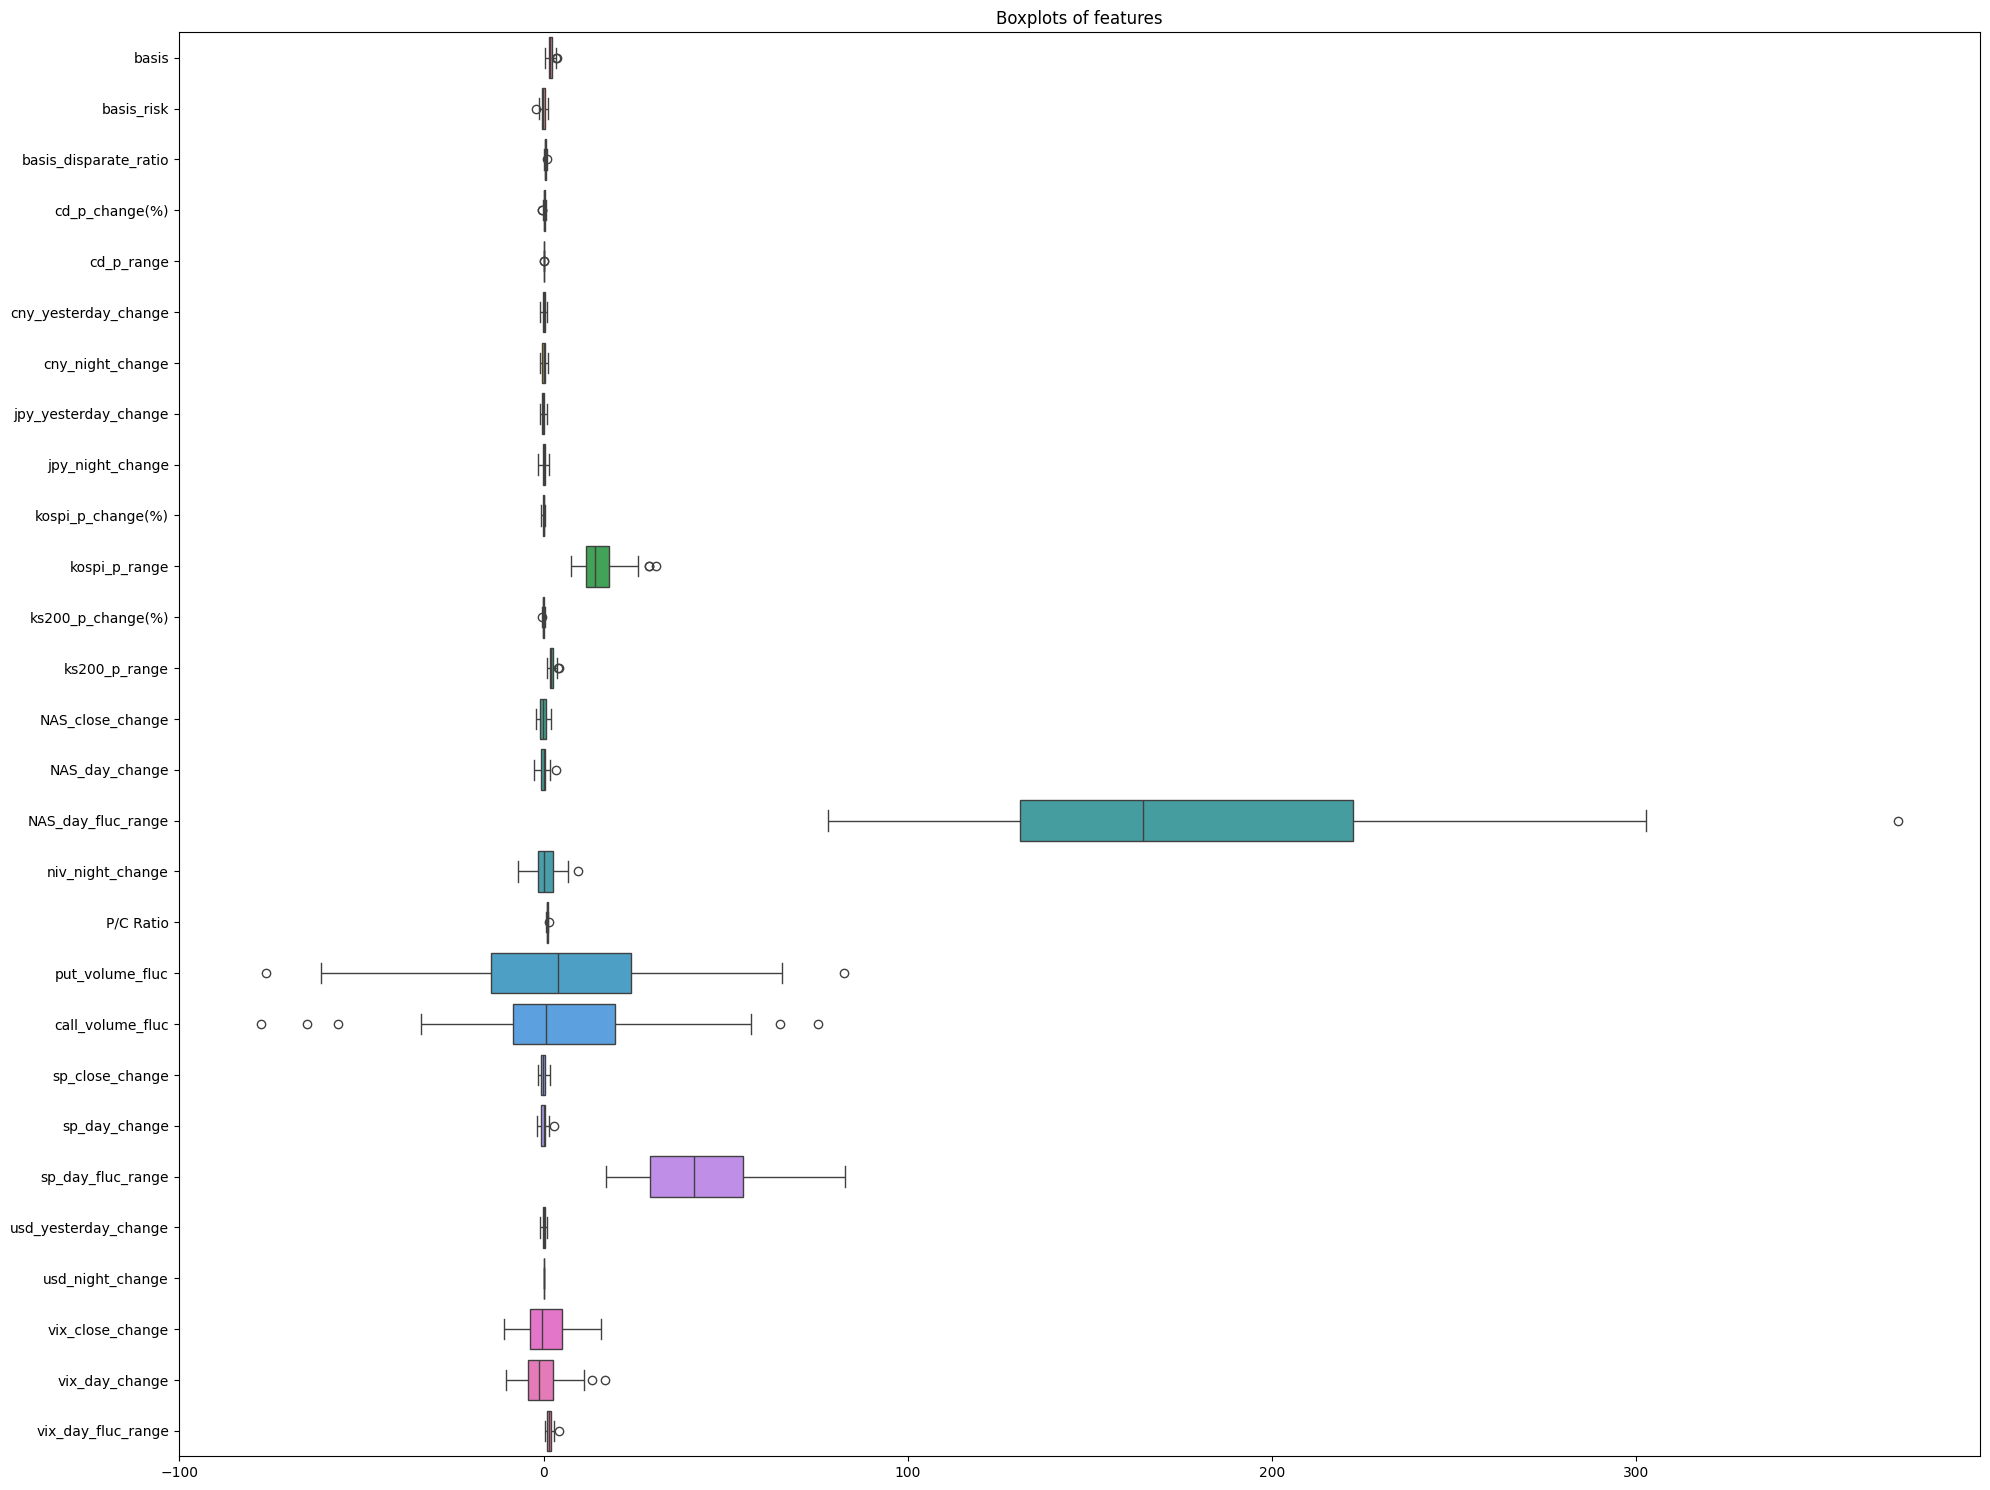

In [17]:
# date 열 제외 boxplot()
# 변수가 많고 변수명도 길어서 가로로 그렸어요
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15)) # 사이즈 조절
sns.boxplot(data=data.drop(columns=['date']), orient='h') # date 제외 boxplot 그리기
plt.title('Boxplots of features') # 그래프 명 지정
plt.tight_layout()
plt.show()


In [22]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 'date' 컬럼을 제외한 나머지 컬럼을 스케일링
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(data.drop(columns='date'))

# 스케일링된 값을 원래 DataFrame에 적용
data_MinMax_scaled = data.copy()
data_MinMax_scaled.iloc[:, 1:] = scaled_values

# 스케일링 후의 데이터를 확인
MinMax_scaled_overview = data_MinMax_scaled.head()

MinMax_scaled_overview

,date,basis,basis_risk,basis_disparate_ratio,cd_p_change(%),cd_p_range,cny_yesterday_change,cny_night_change,jpy_yesterday_change,jpy_night_change,...,put_volume_fluc,call_volume_fluc,sp_close_change,sp_day_change,sp_day_fluc_range,usd_yesterday_change,usd_night_change,vix_close_change,vix_day_change,vix_day_fluc_range
0,2023-07-31,0.869301,0.513274,0.877005,0.502321,0.50,0.666124,0.119294,0.591113,0.644902,...,0.513495,0.456967,0.762319,0.463462,0.137984,0.092188,0.298387,0.128129,0.196243,0.151134
1,2023-08-01,1.000000,0.513274,1.000000,0.502321,0.50,0.768187,0.083118,0.911133,0.193087,...,0.486410,0.621729,0.518841,0.404524,0.060768,0.693353,0.250000,0.491969,0.287584,0.052897
2,2023-08-02,0.978723,0.619469,0.979679,0.502321,0.50,0.643322,0.093885,0.786820,0.054818,...,0.620617,0.640624,0.397101,0.374946,0.000000,0.927705,0.233871,0.490101,0.427737,0.060453
3,2023-08-03,0.553191,0.227139,0.559358,0.254410,0.25,0.612921,0.199397,0.969546,0.000000,...,0.606747,0.479943,0.075362,0.205524,0.427810,0.879185,0.322581,0.987299,0.470926,0.307305
4,2023-08-04,0.924012,1.000000,0.946524,0.253482,0.25,0.427796,0.398363,0.388417,0.298184,...,0.452989,0.669128,0.402899,0.421923,0.256777,0.503639,0.556452,0.368323,0.193303,0.350126


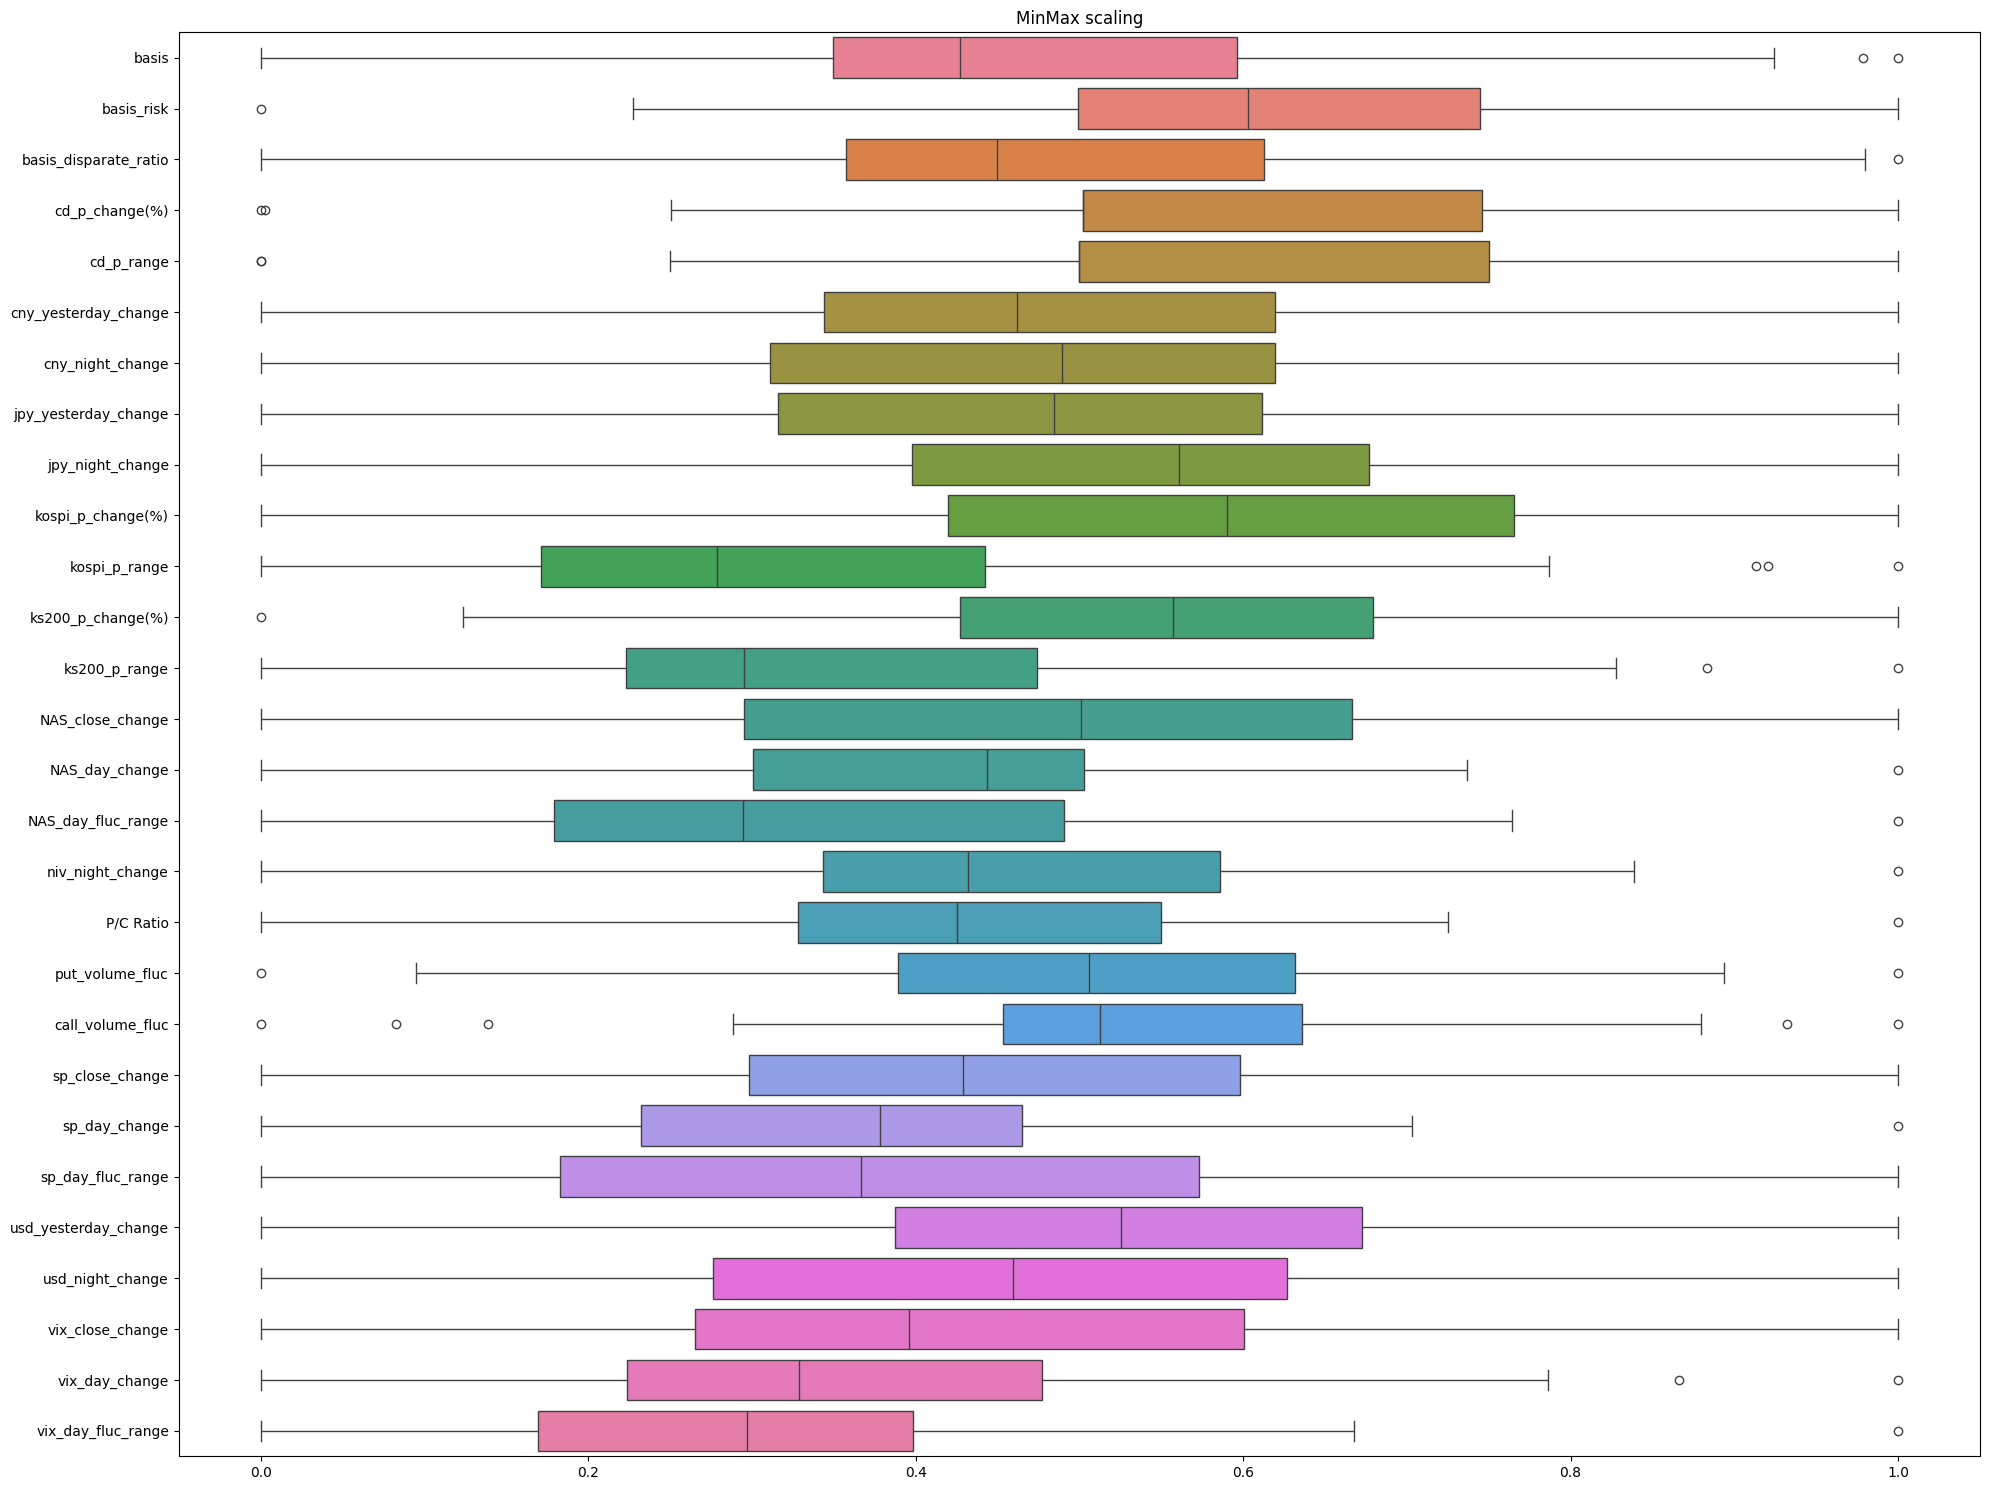

In [23]:
plt.figure(figsize=(20, 15)) # 사이즈 조절
sns.boxplot(data=data_MinMax_scaled, orient='h') # date 제외 boxplot 그리기
plt.title('MinMax scaling') # 그래프 명 지정
plt.tight_layout()
plt.show()

In [24]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# 'date' 컬럼을 제외한 나머지 컬럼을 스케일링
scaler = StandardScaler()
scaled_values = scaler.fit_transform(data.drop(columns='date'))

# 스케일링된 값을 원래 DataFrame에 적용
data_standard_scaled = data.copy()
data_standard_scaled.iloc[:, 1:] = scaled_values

# 스케일링 후의 데이터를 확인
standard_sclaed = data_standard_scaled.head()

standard_sclaed


,date,basis,basis_risk,basis_disparate_ratio,cd_p_change(%),cd_p_range,cny_yesterday_change,cny_night_change,jpy_yesterday_change,jpy_night_change,...,put_volume_fluc,call_volume_fluc,sp_close_change,sp_day_change,sp_day_fluc_range,usd_yesterday_change,usd_night_change,vix_close_change,vix_day_change,vix_day_fluc_range
0,2023-07-31,1.954373,-0.530004,1.880692,-0.183690,-0.184506,0.988001,-1.391240,0.447561,0.463845,...,-0.009768,-0.429651,1.421521,0.597062,-1.049935,-2.010828,-0.698048,-1.335448,-0.811373,-0.845253
1,2023-08-01,2.594618,-0.530004,2.478272,-0.183690,-0.184506,1.476326,-1.538291,1.784334,-1.531086,...,-0.144747,0.452486,0.341089,0.239338,-1.364172,0.714016,-0.895058,0.188775,-0.396834,-1.359883
2,2023-08-02,2.490392,0.025429,2.379541,-0.183690,-0.184506,0.878907,-1.494526,1.265057,-2.141591,...,0.524085,0.553652,-0.199127,0.059816,-1.611471,1.776243,-0.960728,0.180950,0.239236,-1.320296
3,2023-08-03,0.405874,-2.026587,0.337378,-1.426503,-1.429923,0.733449,-1.065629,2.028331,-2.383634,...,0.454961,-0.306633,-1.626841,-0.968475,0.129537,1.556321,-0.599543,2.263846,0.435245,-0.027124
4,2023-08-04,2.222382,2.015730,2.218454,-1.431158,-1.429923,-0.152289,-0.256852,-0.399132,-1.067041,...,-0.311303,0.706261,-0.173403,0.344939,-0.566494,-0.145882,0.352672,-0.329211,-0.824718,0.197201


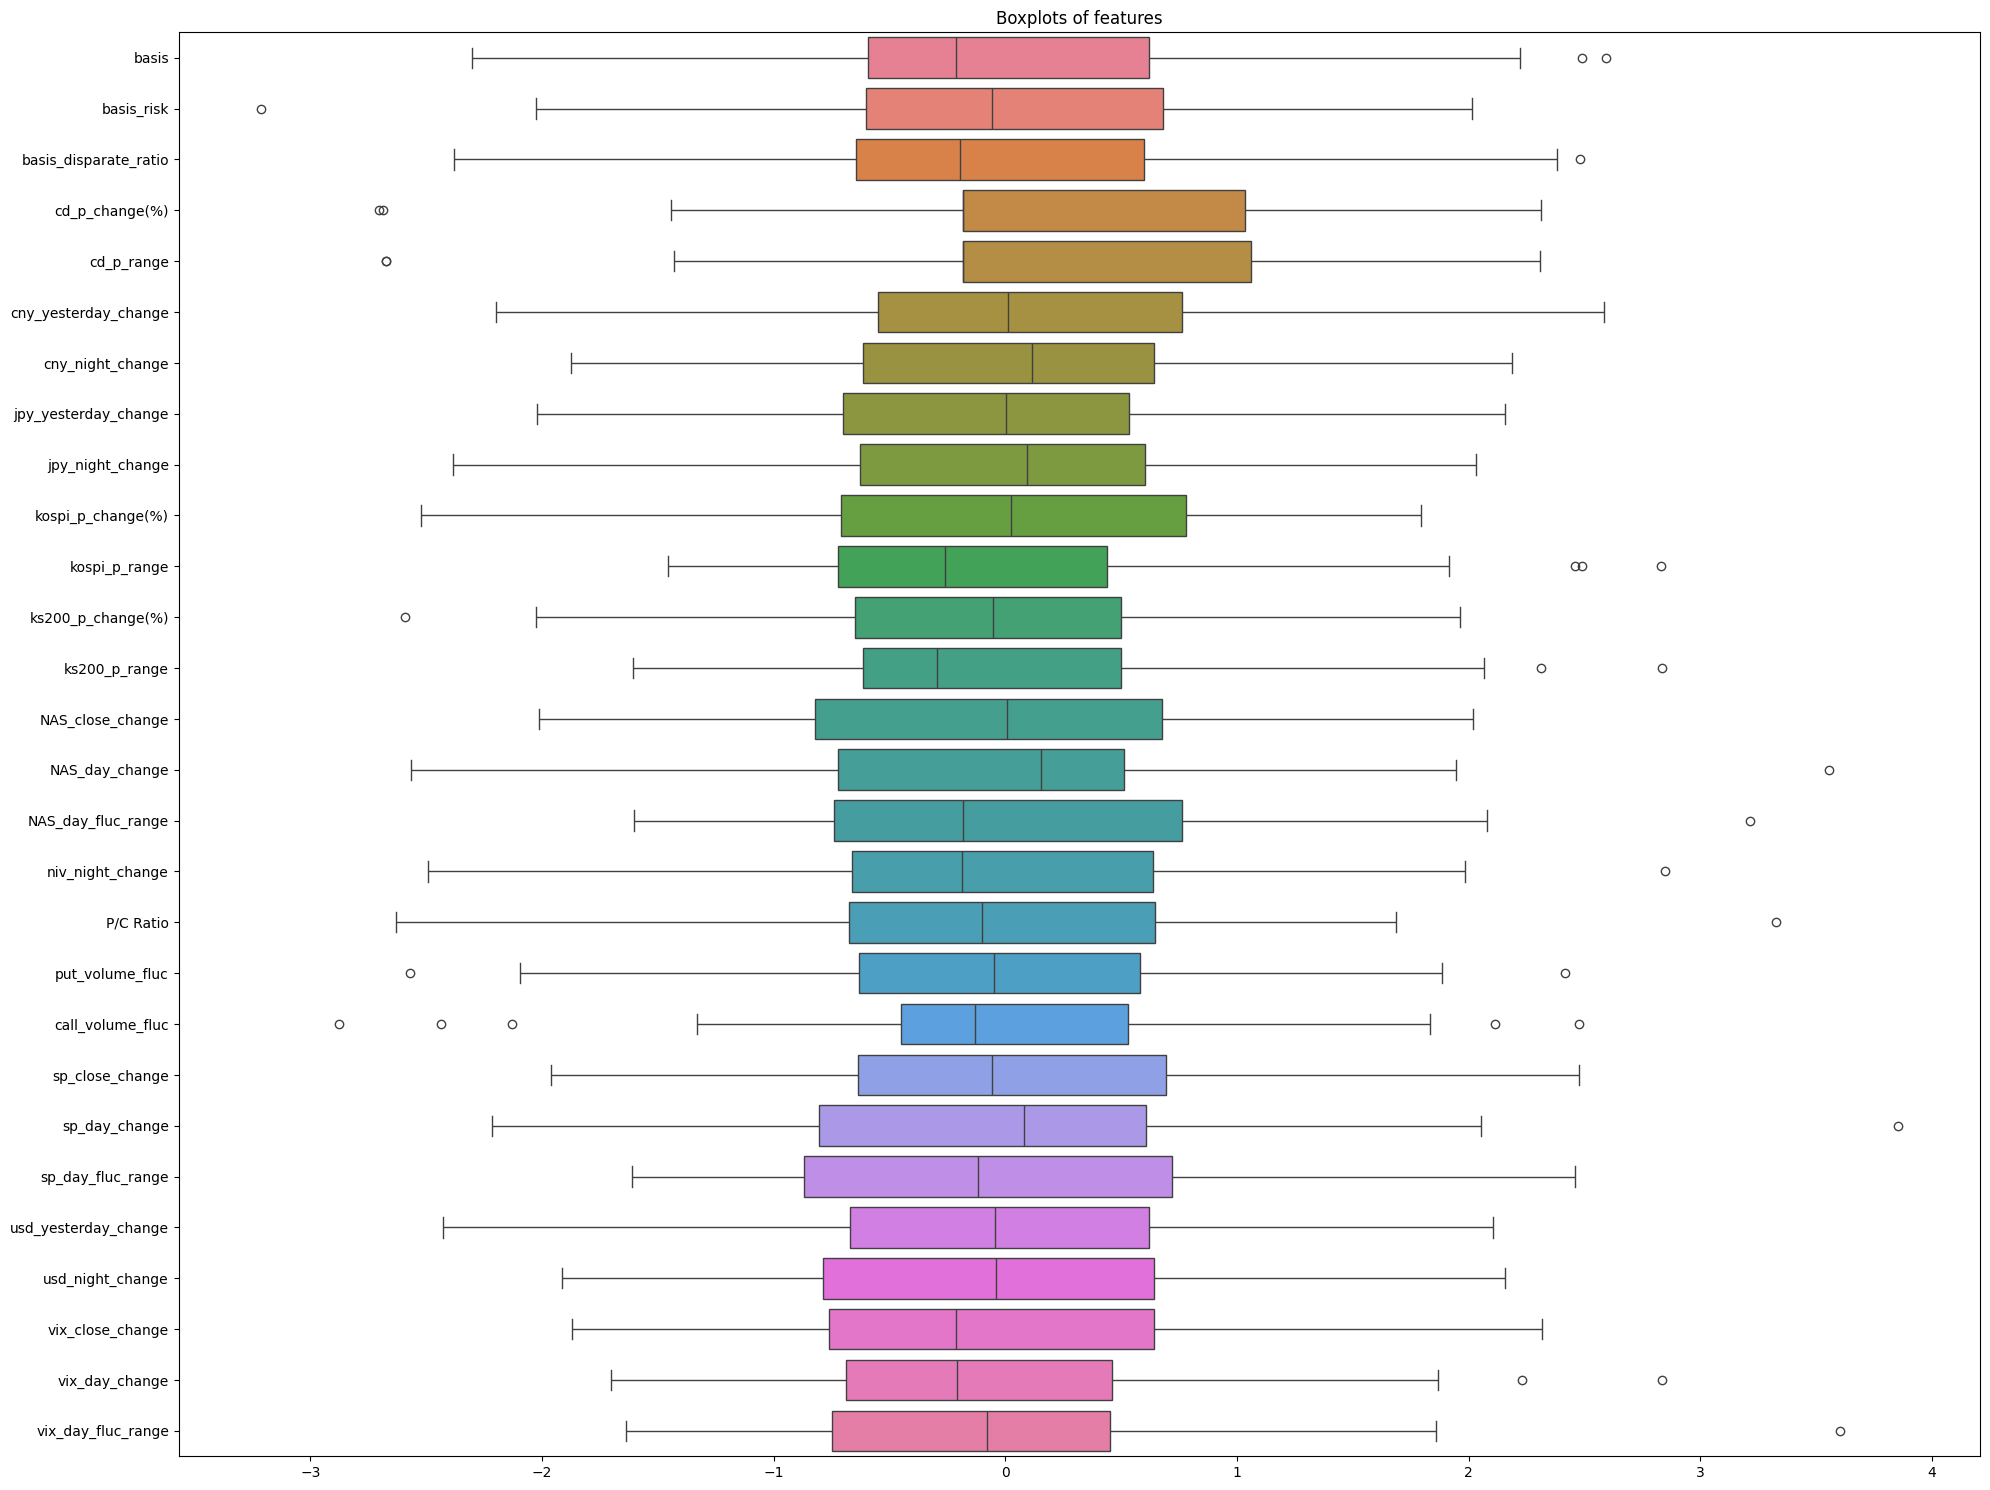

In [25]:
plt.figure(figsize=(20, 15)) # 사이즈 조절
sns.boxplot(data=data_standard_scaled, orient='h') # date 제외 boxplot 그리기
plt.title('Boxplots of features') # 그래프 명 지정
plt.tight_layout()
plt.show()